In [8]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


<h1>Exploratory Data Analysis<h1>

In [9]:
census = pd.read_csv("Family Income and Expenditure.csv")

<h1>Insight 1: Population Distribution by Region</h1>
<br>CALABARZON and NCR are the most populated regions, each with over 4,000 households. This suggests high urbanization in these areas. CALABARZON and NCR, being near Metro Manila, likely attract more people due to job opportunities, infrastructure, and economic activity. We used bar plot to compare household counts across regions.

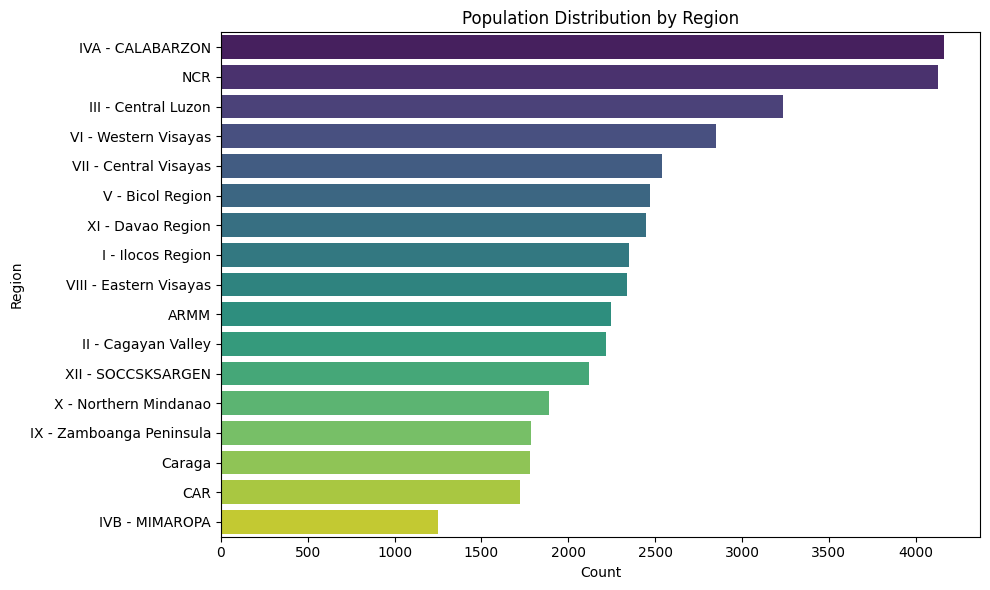

In [10]:
regions = ['IVA - CALABARZON', 'NCR', 'III - Central Luzon', 'VI - Western Visayas', 
           'VII - Central Visayas', 'V - Bicol Region', 'XI - Davao Region', 
           'I - Ilocos Region', 'VIII - Eastern Visayas', 'ARMM', 'II - Cagayan Valley', 
           'XII - SOCCSKSARGEN', 'X - Northern Mindanao', 'IX - Zamboanga Peninsula', 
           'Caraga', 'CAR', 'IVB - MIMAROPA']
counts = [4162, 4130, 3237, 2851, 2541, 2472, 2446, 2348, 2337, 2248, 2219, 2122, 
          1887, 1788, 1782, 1725, 1249]

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=regions, hue=regions, palette='viridis', legend=False)
plt.title('Population Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

<h1>Insight 2: Main Source of Income</h1>
<br>Wage/salaries are the primary income source for over 20,000 households. This indicates a reliance on formal employment. Urbanization and industrial growth likely drive demand for salaried jobs, especially in regions like NCR and CALABARZON. We used pie chart to show the proportion of income sources.

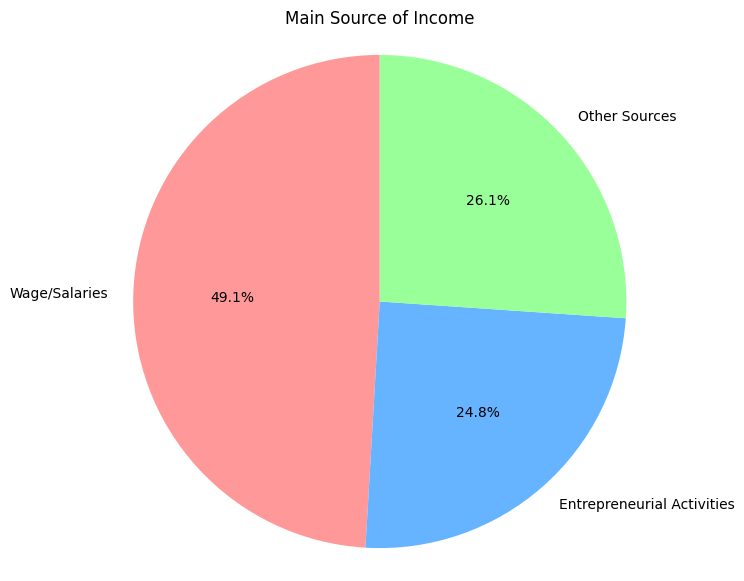

In [11]:
sources = ['Wage/Salaries', 'Entrepreneurial Activities', 'Other Sources']
counts = [20388, 10320, 10836]
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=sources, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Main Source of Income')
plt.axis('equal')
plt.show()

<h1>Insight 3: Household Head Sex Distribution</h1>
<br>Most household heads are male (over 32,000). This reflects traditional gender roles in household leadership. Cultural norms in the Philippines may favor males as primary decision-makers, though female-headed households are notable. We used pie chart for male vs. female distribution.

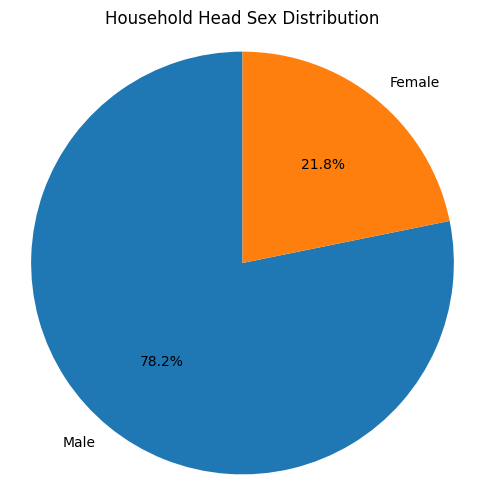

In [12]:
sex = ['Male', 'Female']
counts = [32483, 9061]
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=sex, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Household Head Sex Distribution')
plt.axis('equal')
plt.show()

<h1>Insight 4: Household Head Marital Status</h1>
<br>Over 31,000 household heads are married. This suggests stable family structures dominate. Marriage is culturally significant, and married heads may reflect established households with children. We usde bar plot for marital status counts.

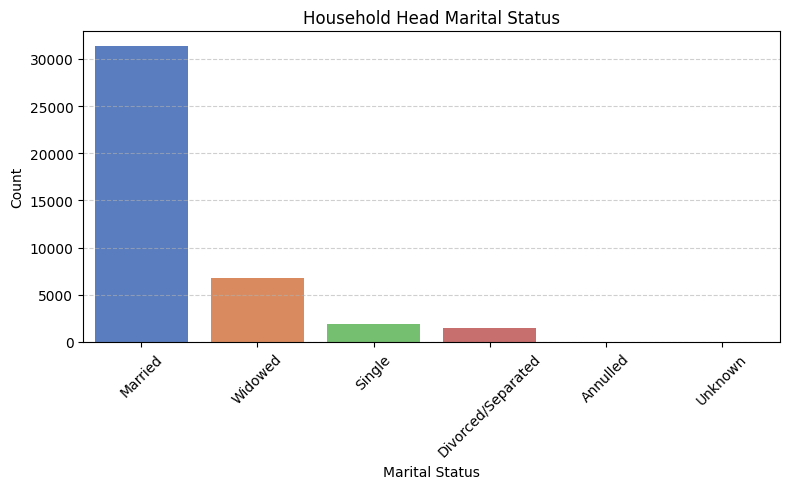

In [13]:
status = ['Married', 'Widowed', 'Single', 'Divorced/Separated', 'Annulled', 'Unknown']
counts = [31347, 6818, 1942, 1425, 11, 1]

plt.figure(figsize=(8, 5))
sns.barplot(x=status, y=counts, hue=status, palette='muted', legend=False)
plt.title('Household Head Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y',linestyle='--',alpha=0.6)

plt.show()

<h1>Insight 5: Top 5 Household Head Occupations</h1>
<br>Farmhands and laborers (3,478) and rice farmers (2,849) are common occupations. Agriculture remains significant. Rural areas, especially outside NCR, rely heavily on agriculture, supporting food security and local economies. We used bar plot for top 5 occupations.

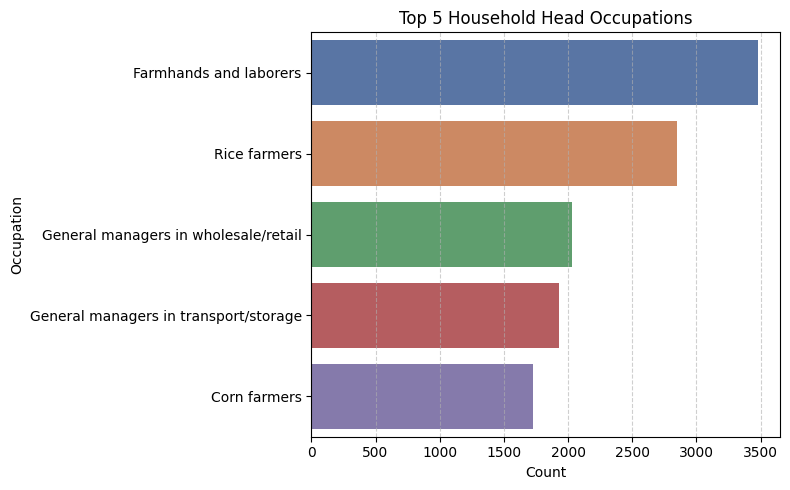

In [14]:

occupations = ['Farmhands and laborers', 'Rice farmers', 
               'General managers in wholesale/retail', 
               'General managers in transport/storage', 'Corn farmers']
counts = [3478, 2849, 2028, 1932, 1724]

plt.figure(figsize=(8, 5))
sns.barplot(x=counts, y=occupations, hue=occupations, palette='deep', legend=False)
plt.title('Top 5 Household Head Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.tight_layout()
plt.grid(axis='x',linestyle='--',alpha=0.6)
plt.show()

<h1>Insight 6: Type of Household</h1>
<br>Single-family households dominate (28,445). Extended families are also common (12,932). Cultural values emphasize close family ties, leading to both nuclear and extended family structures. We used pie chart for household type distribution.

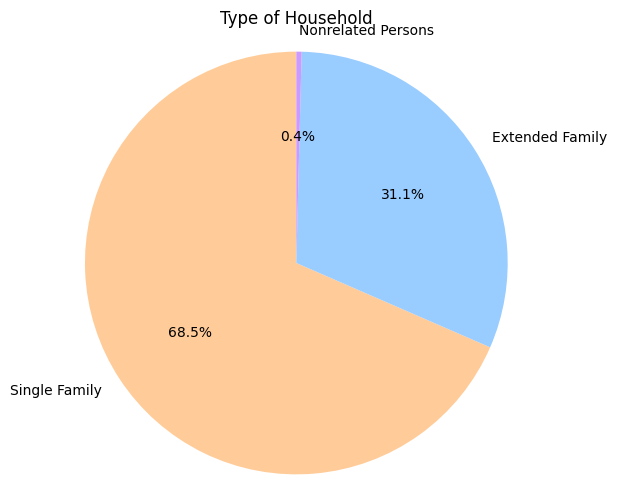

In [15]:
household_types = ['Single Family', 'Extended Family', 'Nonrelated Persons']
counts = [28445, 12932, 167]
colors = ['#ffcc99', '#99ccff', '#cc99ff']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=household_types, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Type of Household')
plt.axis('equal')
plt.show()

<h1>Insight 7: Type of Building/House</h1>
<br>Single houses are the most common (39,069). Other building types are rare. Single houses are practical for families and align with land availability in suburban and rural areas. We used bar plot for building types.

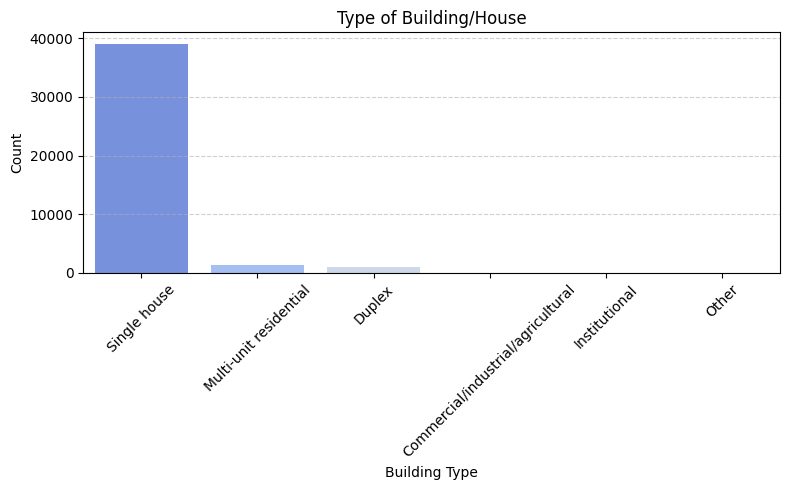

In [16]:

building_types = ['Single house', 'Multi-unit residential', 'Duplex', 
                  'Commercial/industrial/agricultural', 'Institutional', 'Other']
counts = [39069, 1329, 1084, 51, 9, 2]

plt.figure(figsize=(8, 5))
sns.barplot(x=building_types, y=counts, hue=building_types, palette='coolwarm', legend=False)
plt.title('Type of Building/House')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.6)

plt.tight_layout()
plt.show()

<h1>Insight 8: Tenure Status Distribution</h1>
<br>Most households (29,541) own their house and lot. Renting is less common. Homeownership is a cultural priority, and inherited land supports owner-like possession. We used pie chart for tenure status.

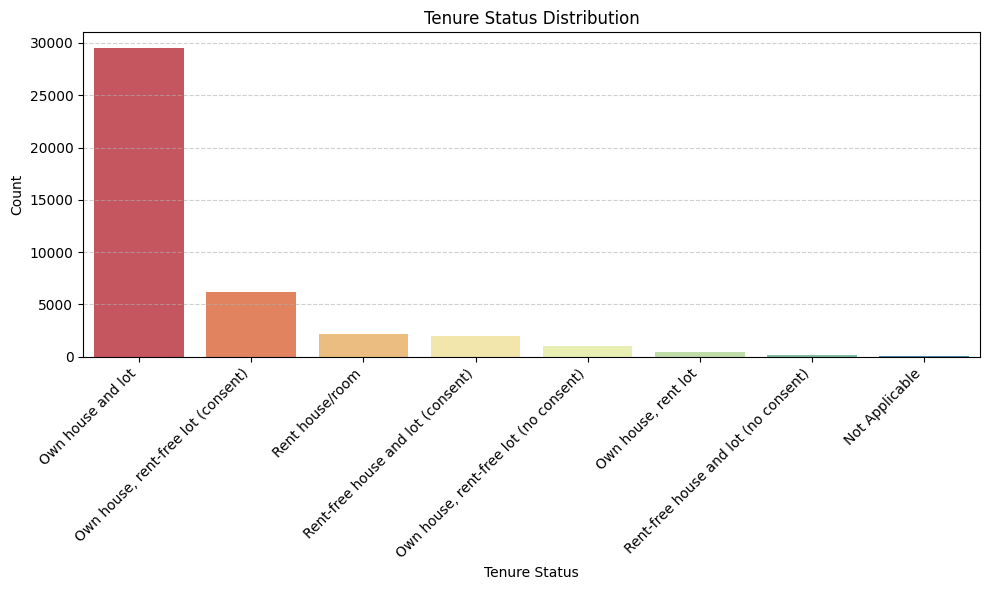

In [17]:
tenure = ['Own house and lot', 'Own house, rent-free lot (consent)', 
          'Rent house/room', 'Rent-free house and lot (consent)', 
          'Own house, rent-free lot (no consent)', 'Own house, rent lot', 
          'Rent-free house and lot (no consent)', 'Not Applicable']
counts = [29541, 6165, 2203, 2014, 995, 425, 128, 73]

plt.figure(figsize=(10, 6))
sns.barplot(x=tenure, y=counts, hue=tenure, palette='Spectral', legend=False)
plt.title('Tenure Status Distribution')
plt.xlabel('Tenure Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 9: Main Source of Water Supply</h1>
<br>Own-use faucet from a community water system is the top water source (16,093). Access to piped water is widespread. Government investments in water infrastructure likely prioritize community systems, especially in urban areas. We used bar plot for top 5 water sources.

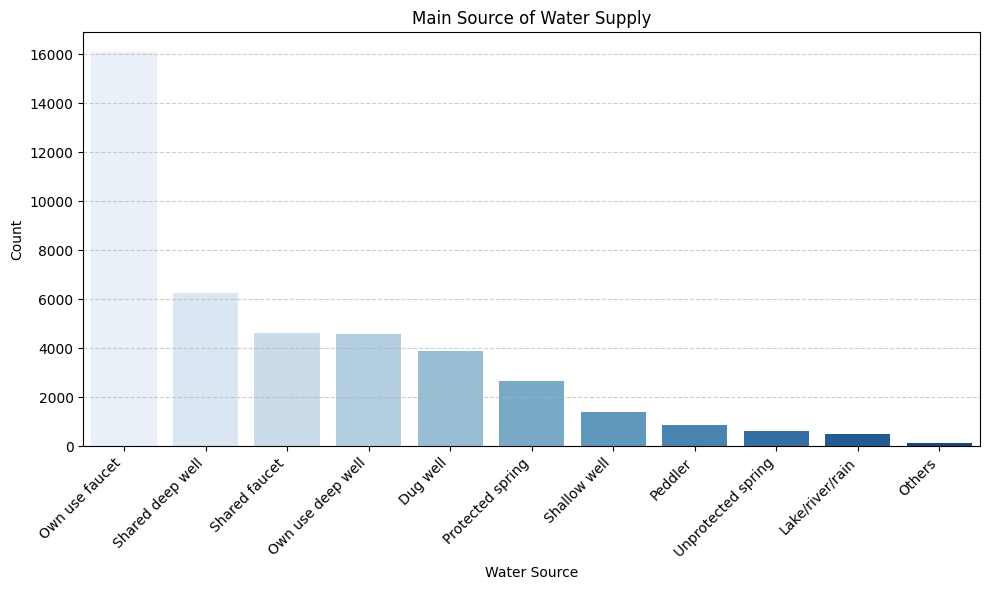

In [18]:
water_sources = ['Own use faucet', 'Shared deep well', 'Shared faucet', 
                 'Own use deep well', 'Dug well', 'Protected spring', 
                 'Shallow well', 'Peddler', 'Unprotected spring', 
                 'Lake/river/rain', 'Others']
counts = [16093, 6242, 4614, 4587, 3876, 2657, 1394, 851, 607, 496, 127]

plt.figure(figsize=(10, 6))
sns.barplot(x=water_sources, y=counts, hue=water_sources, palette='Blues', legend=False)
plt.title('Main Source of Water Supply')
plt.xlabel('Water Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 10: Toilet Facilities</h1>
<br>Water-sealed sewer septic tanks used exclusively by households are the most common toilet facilities. Open pits and other basic facilities are less prevalent.

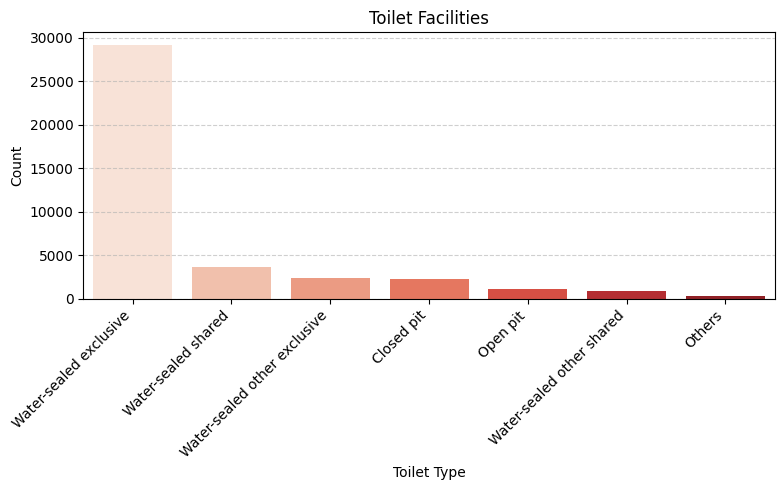

In [19]:
toilet_types = ['Water-sealed exclusive', 'Water-sealed shared', 
                'Water-sealed other exclusive', 'Closed pit', 
                'Open pit', 'Water-sealed other shared', 'Others']
counts = [29162, 3694, 2343, 2273, 1189, 950, 353]

plt.figure(figsize=(8, 5))
sns.barplot(x=toilet_types, y=counts, hue=toilet_types, palette='Reds', legend=False)
plt.title('Toilet Facilities')
plt.xlabel('Toilet Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [20]:
#getting the objects dtypes columns 
object_cols = census.select_dtypes(include=['object']).columns.tolist()
object_cols

#converting objects into category 
for column in object_cols:
    census[column] = census[column].astype('category')

census.dtypes.head(4)
census['Region'] = census['Region'].str.strip()  # Remove leading/trailing whitespace

census['percentage of food expenditure over household income'] = (census['Total Food Expenditure'] / census['Total Household Income']) * 100

census['total expenditure sa bisyo'] = census['Tobacco Expenditure'] + census['Alcoholic Beverages Expenditure']
census['percentage of bisyo over household income'] = (census['total expenditure sa bisyo'] / census['Total Household Income']) * 100



In [21]:
census['Total Household Income (monthly)'] = census['Total Household Income'] / 12
def classify_income(income):
    if income < 13873:
        return 'Poor'
    elif income < 28000:        
        return 'Low-Income (non-poor)'
    elif income < 55000:
        return 'Lower Middle-Income'
    elif income < 97000:
        return 'Middle Middle-Income'
    elif income < 166000:
        return 'Upper Middle-Income'
    elif income < 277000:
        return 'Upper-Income (non-rich)'
    else:
        return 'Rich'

# Apply it to your DataFrame
census['Income Class'] = census['Total Household Income (monthly)'].apply(classify_income)


In [22]:
luzon_list = [
    'CAR',                
    'NCR',                
    'I - Ilocos Region',
    'II - Cagayan Valley',
    'III - Central Luzon',
    'IVA - CALABARZON',
    'IVB - MIMAROPA',
    'V - Bicol Region'
]

luzon = census[census['Region'].isin(luzon_list)]

visayas_regions_list = ['VI - Western Visayas', 'VII - Central Visayas', 'VIII - Eastern Visayas']
visayas = census[census['Region'].isin(visayas_regions_list)]

# Now filter with clean comparison list
mindanao_regions_list = [
    'Caraga',
    'ARMM',
    'X - Northern Mindanao',
    'XI - Davao Region',
    'XII - SOCCSKSARGEN',
    'IX - Zamboanga Peninsula'
]

mindanao = census[census['Region'].isin(mindanao_regions_list)]

In [23]:
def assign_island_group(region):
    luzon = [
        'CAR', 'NCR', 'I - Ilocos Region', 'II - Cagayan Valley',
        'III - Central Luzon', 'IVA - CALABARZON',
        'IVB - MIMAROPA', 'V - Bicol Region'
    ]
    visayas = [
        'VI - Western Visayas', 'VII - Central Visayas', 'VIII - Eastern Visayas'
    ]
    mindanao = [
        'IX - Zamboanga Peninsula', 'X - Northern Mindanao',
        'XI - Davao Region', 'XII - SOCCSKSARGEN', 'Caraga', 'ARMM','IX - Zasmboanga Peninsula'
    ]
    
    if region in luzon:
        return 'Luzon'
    elif region in visayas:
        return 'Visayas'
    elif region in mindanao:
        return 'Mindanao'
    else:
        return 'Unknown'

# Apply the function to create a new column
census['Island Group'] = census['Region'].apply(assign_island_group)


<h2>What region have the highest number of poverty in different three main island<h2>

<h2>Insight 1. In all three major island groups – Luzon, Visayas, and Mindanao – the poorest segments of society represent the largest portion of the population.<h2>

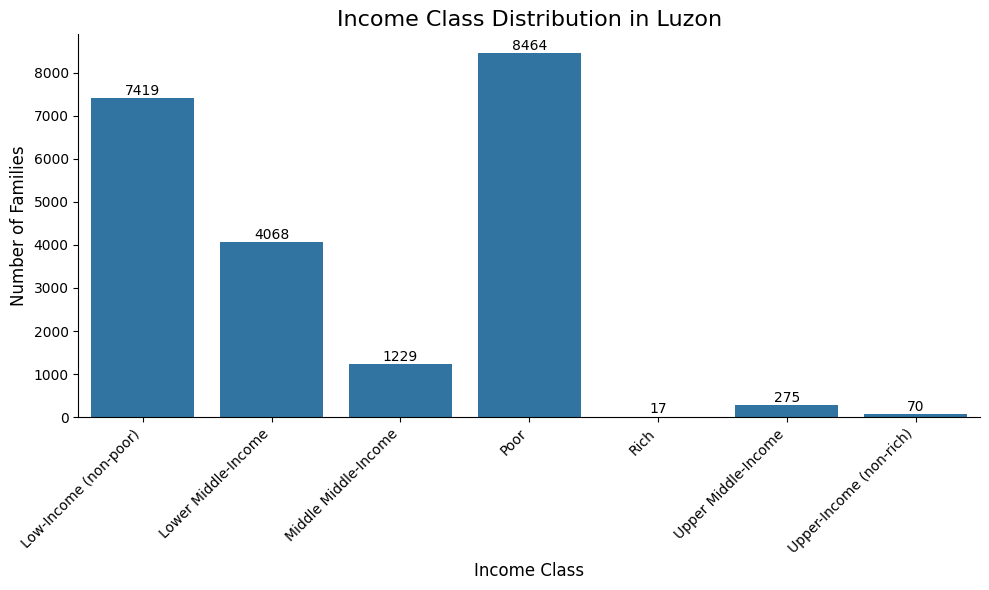

In [24]:
luzon_income_clas = luzon.groupby(['Income Class']).size()
plt.figure(figsize=(10, 6))
sns.barplot(x=luzon_income_clas.index, y=luzon_income_clas.values)

plt.title('Income Class Distribution in Luzon', fontsize=16)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Families', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(luzon_income_clas.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

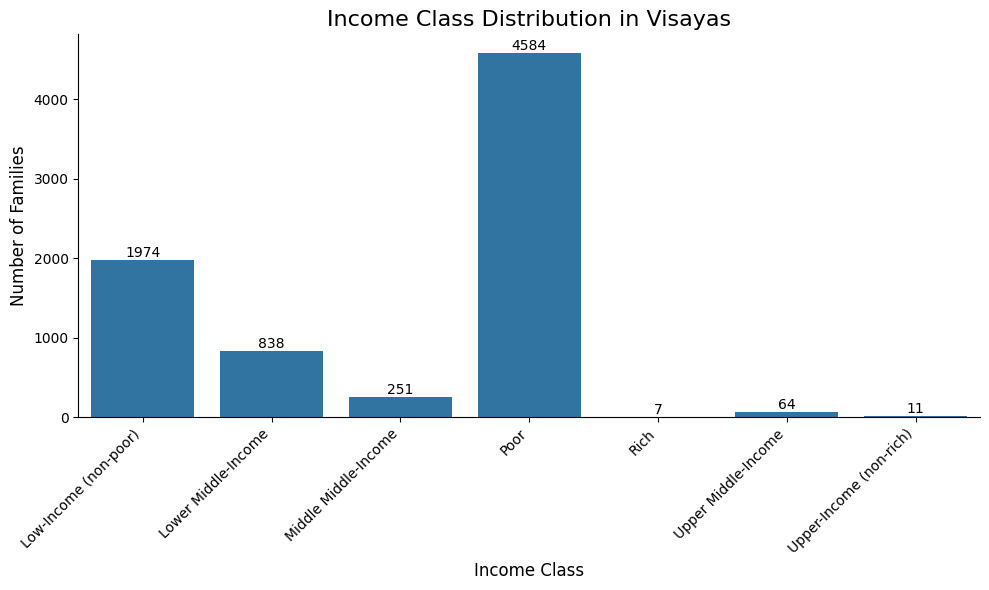

In [25]:
visayas_income_clas = visayas.groupby(['Income Class']).size()
plt.figure(figsize=(10, 6))
sns.barplot(x=visayas_income_clas.index, y=visayas_income_clas.values)

plt.title('Income Class Distribution in Visayas', fontsize=16)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Families', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(visayas_income_clas.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

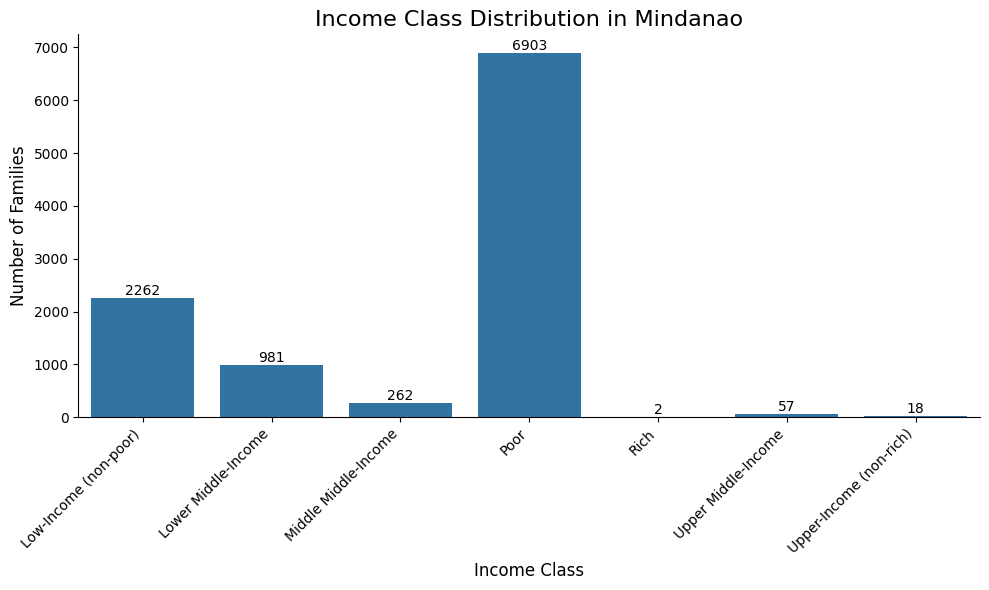

In [26]:
mindanao_income_clas = mindanao.groupby(['Income Class']).size()
plt.figure(figsize=(10, 6))
sns.barplot(x=mindanao_income_clas.index, y=mindanao_income_clas.values)

plt.title('Income Class Distribution in Mindanao', fontsize=16)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Families', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(mindanao_income_clas.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

<h2>Insight 2. With a poverty rate of 39.29%, a significant portion of Luzon's population is classified as living in poverty, although this is lower than the rates observed in Mindanao (65.83%) and Visayas (59.31%).<h2>

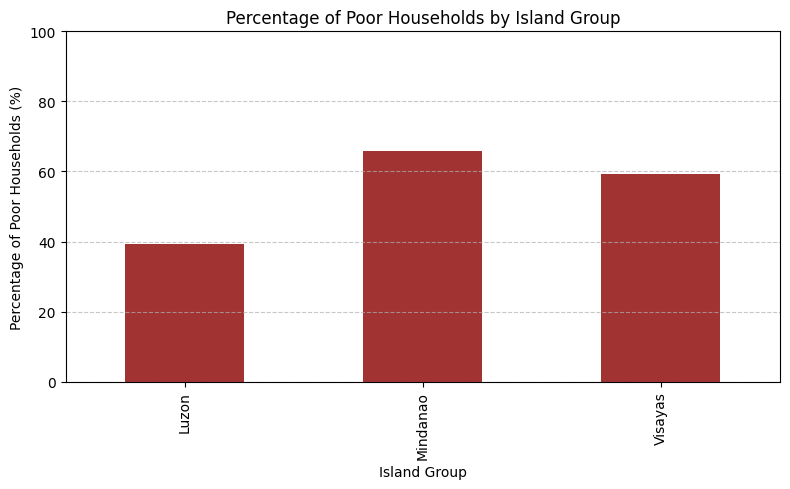

In [28]:
poor_households = census[census["Income Class"] == "Poor"]

total_by_island = census["Island Group"].value_counts()

poor_by_island = poor_households["Island Group"].value_counts()

poor_percentage = (poor_by_island / total_by_island * 100).round(2)

plt.figure(figsize=(8, 5))
poor_percentage.plot(kind="bar", color="darkred", alpha=0.8)
plt.title("Percentage of Poor Households by Island Group")
plt.xlabel("Island Group")
plt.ylabel("Percentage of Poor Households (%)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<h2>In luzon do NCR have the highest number of poverty?<h2>

<h2>Insight 3. Bicol Region has a high percentage of poor households in the Philippines, with 64.85% of households classified as poor. While it has a significant poverty rate, the data shows that MIMAROPA (Region IVB) has a slightly higher percentage of poor households in Luzon at 60.69%. <h2>

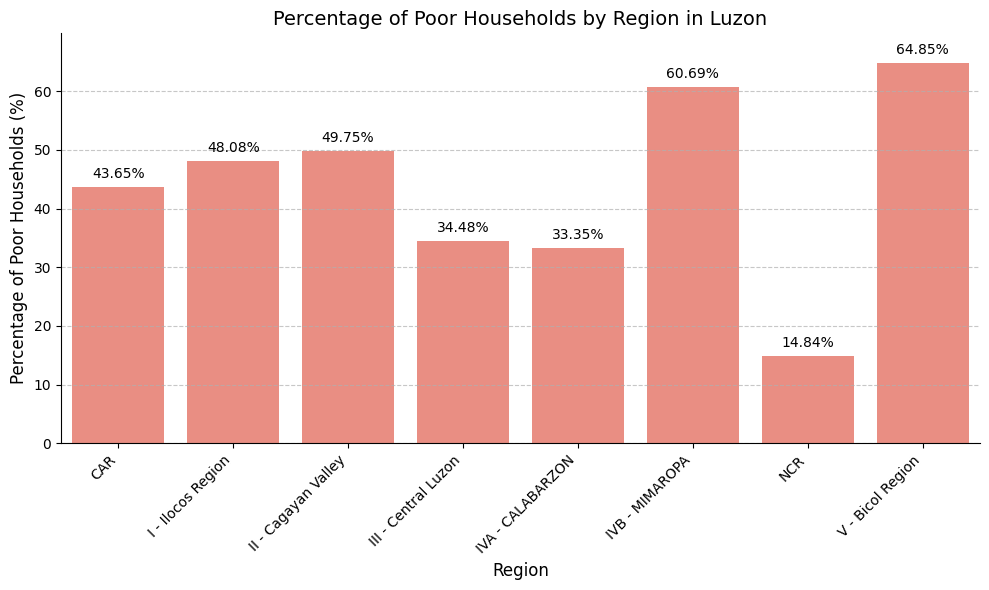

In [29]:
poor_households = luzon[luzon["Income Class"] == "Poor"]
total_by_region = luzon["Region"].value_counts()
poor_by_region = poor_households["Region"].value_counts()
poor_percentage_luzon = (poor_by_region / total_by_region * 100).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x=poor_percentage_luzon.index, y=poor_percentage_luzon.values, color="salmon")

plt.title("Percentage of Poor Households by Region in Luzon", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Percentage of Poor Households (%)", fontsize=12)
plt.ylim(0, poor_percentage_luzon.max() + 5)  # Adjust y-axis limit
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels on top of the bars
for index, value in enumerate(poor_percentage_luzon.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

<h2>Finding out what is main source of income of an average bicolano<h2>

<h3>Insight 4: In Bicol, most people (1022 households) rely on wages or salaries for income. A good number also run their own small businesses (584 households), while a significant portion (866 households) depend on other income like remittances or aid. Given Bicol's high poverty rate, these numbers suggest that for many families, their earnings from jobs, businesses, or other sources aren't enough to escape poverty.<h3>

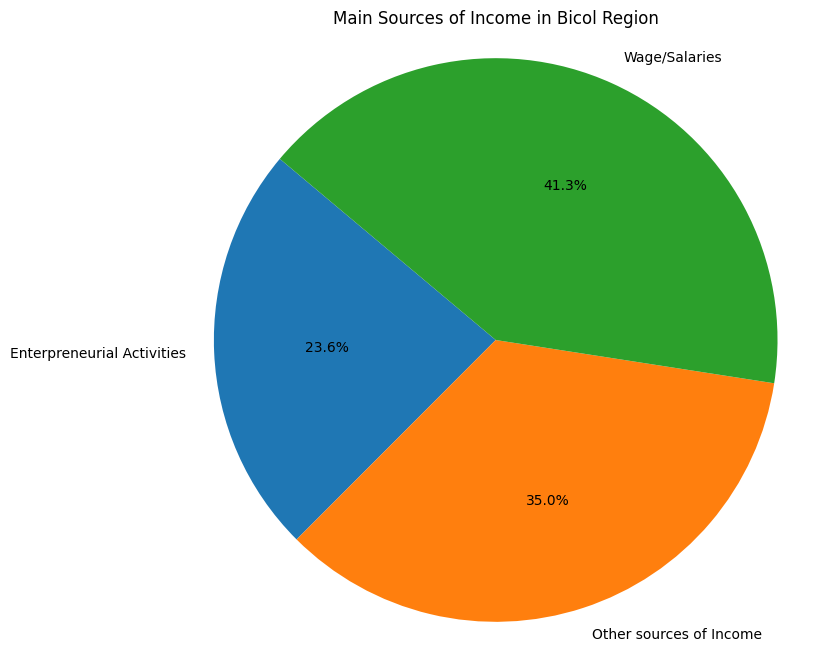

In [30]:
bicol = luzon[luzon['Region'] == 'V - Bicol Region']

main_source_bicol = bicol.groupby(['Main Source of Income']).size()
plt.figure(figsize=(8, 8))  # Adjust figure size for better readability
plt.pie(main_source_bicol,
        labels=main_source_bicol.index,
        autopct='%1.1f%%',
        startangle=140)

plt.title('Main Sources of Income in Bicol Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h2>Total food expenditure of bicolano <h2>

<h2>Insight 5. People in the Bicol Region spend a much larger share of their income on food (about 51%) than in other parts of Luzon, which might mean more people there have difficulty meeting their basic needs.h2>

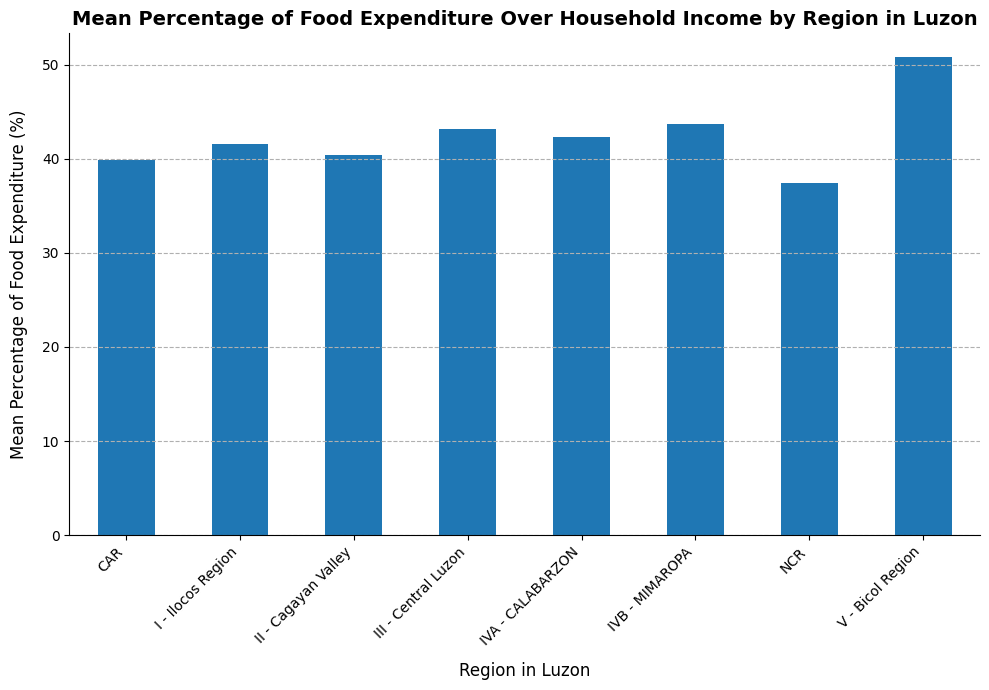

In [31]:
total_food_expense_luzon = luzon.groupby(['Region'])['percentage of food expenditure over household income'].mean()
plt.figure(figsize=(10,7))

total_food_expense_luzon.plot(kind='bar')

plt.xlabel('Region in Luzon', fontsize=12, labelpad=10)
plt.ylabel('Mean Percentage of Food Expenditure (%)', fontsize=12, labelpad=10)
plt.title('Mean Percentage of Food Expenditure Over Household Income by Region in Luzon', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)


plt.grid(axis='y', linestyle='--')
sns.despine()
plt.tight_layout()
plt.show()

<h2>What is the most common household class of worker in bicol region<h2>

<h2>Insight 6: Over 53% of these household heads are self-employed without employees, highlighting a significant reliance on independent livelihoods.<h2>

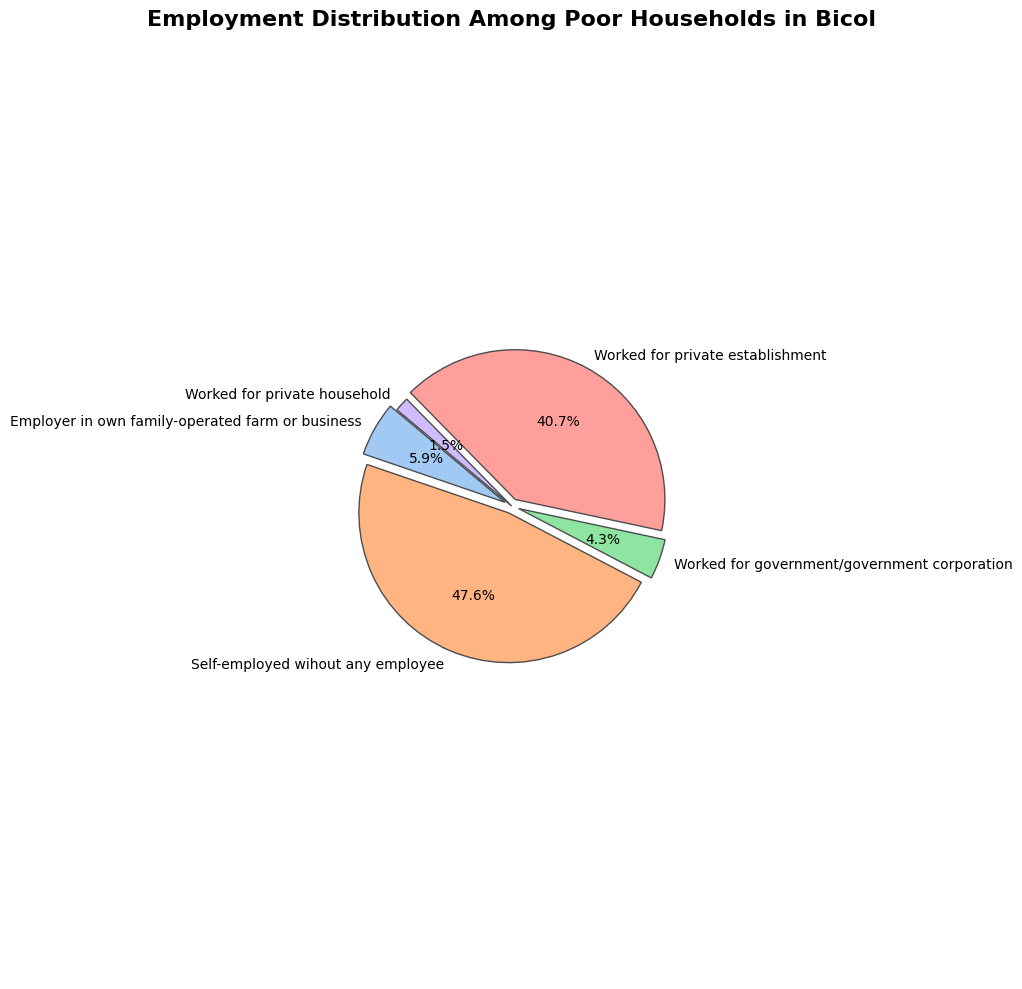

In [32]:


poor_household_bicol = bicol[bicol['Income Class'] == 'Poor']
jobs_in_bicol = poor_household_bicol.groupby(['Household Head Class of Worker']).size().head(5)

plt.figure(figsize=(10, 10))
sns.set_palette("pastel")

patches, texts, autotexts = plt.pie(jobs_in_bicol,
                                     labels=jobs_in_bicol.index,
                                     autopct='%1.1f%%',
                                     startangle=140,
                                     explode=[0.05 if count > jobs_in_bicol.quantile(0.1) else 0 for count in jobs_in_bicol.values],
                                     wedgeprops={'edgecolor': '0.3'})

plt.title('Employment Distribution Among Poor Households in Bicol', fontsize=16, fontweight='bold')
plt.axis('equal')

for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')

sns.despine(left=True, bottom=True, right=True)
plt.tight_layout()
plt.show()

<h2>island with the highest number of percentage of bad habit expenditure over total income<h2>

<h2>Insight 7: Visayas shows the highest average percentage of household income spent on vices at 2.22%, compared to 1.99% in Mindanao and 1.87% in Luzon.<h2>

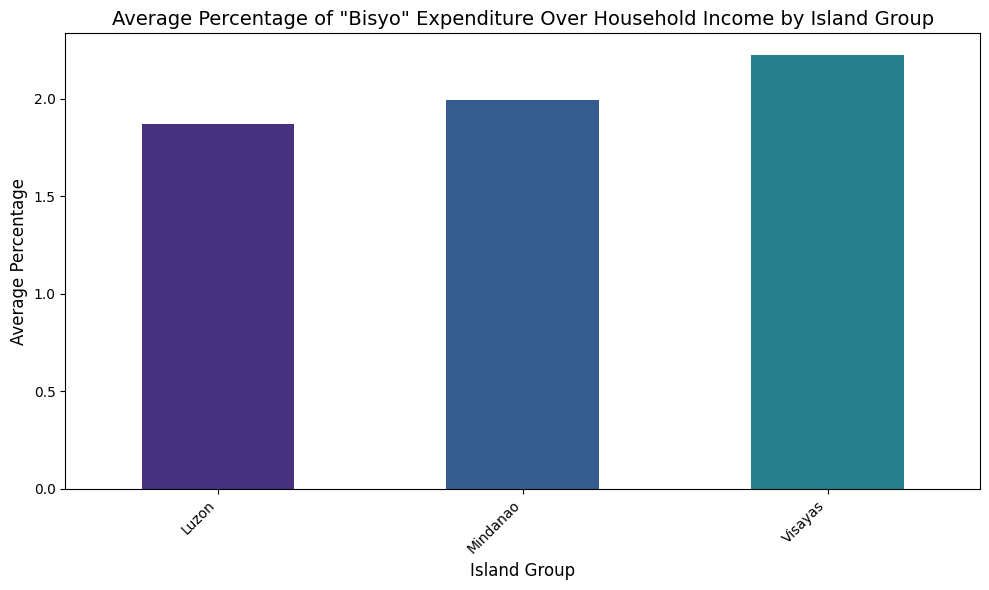

In [33]:
island_group_bisyo = census.groupby(['Island Group'])['percentage of bisyo over household income'].mean()

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
island_group_bisyo.plot(kind='bar', color=sns.color_palette("viridis")) # Use a visually appealing color palette
plt.title('Average Percentage of "Bisyo" Expenditure Over Household Income by Island Group', fontsize=14)
plt.xlabel('Island Group', fontsize=12)
plt.ylabel('Average Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


<h2>top earning occupation<h2>

<h2>Insight 8: Accountants and Auditors, as well as Editors (Advertising and Public Relations Managers), earn the highest annual wage at around 600,000 pesos , which translates to approximately 50,000 pesos monthly .<h2>

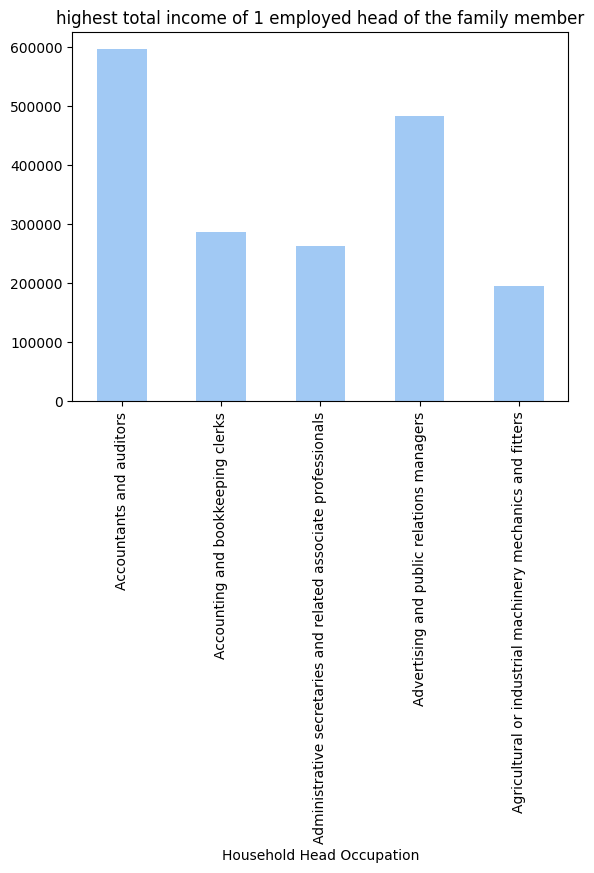

In [34]:
#steven
census['Household Head Occupation'].value_counts()
income_head = census.groupby(['Household Head Occupation'])['Total Household Income'].mean()
income_head

#dito makikita natin na ang may pinakamalaking household na sweldo ay ang mga accountants saka auditor yan yung total bali try natin yung 
#iisa lang ang employe sa familya 
#ok still auditor 
soloworker = census[census['Total number of family members employed'] == 1]
income_head_solo = soloworker.groupby(['Household Head Occupation'])['Total Household Income'].mean().head()
income_head_solo.plot(kind='bar')
plt.title('highest total income of 1 employed head of the family member')
plt.show()

<h2>average food expenses daily<h2>

<h2>Insigh 9: Even though family sizes vary, daily food expenditures among poor households remain relatively low regardless of the number of family members. This suggests that poor families are making ends meet by keeping food spending minimal, often having to stretch limited resources (e.g., around ₱200 to ₱500 per day ) regardless of household size.<h2>

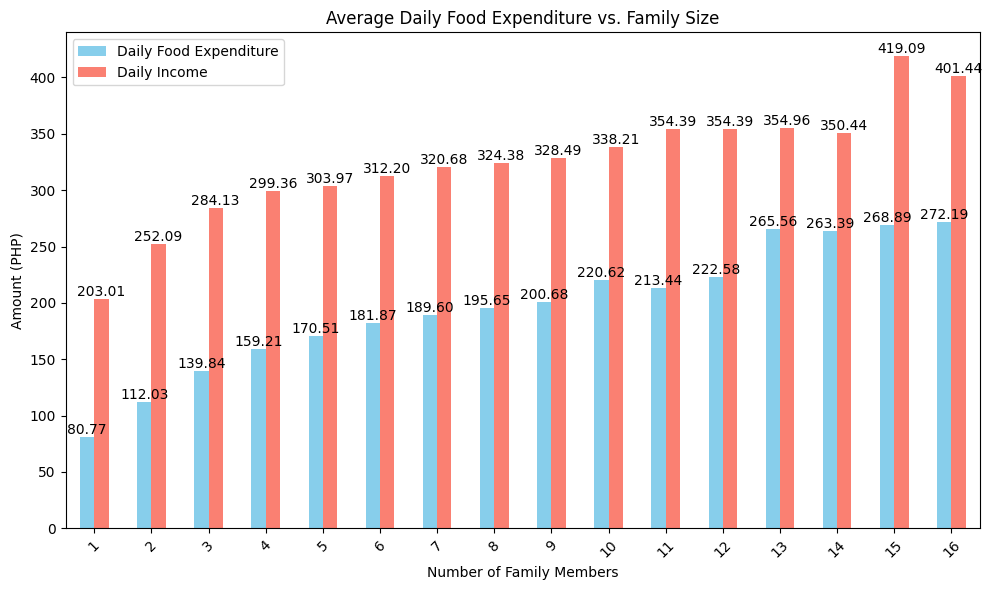

In [35]:
# Filter for 'Poor' income class and calculate daily metrics
poor = census[census['Income Class'] == 'Poor']
poor['daily_food'] = poor['Total Food Expenditure'] / 365
poor['daily_income'] = poor['Total Household Income'] / 365

# Group by family size and compute average food and income
grouped = poor.groupby('Total Number of Family members')[['daily_food', 'daily_income']].mean()

# Plot the comparison
ax = grouped.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Average Daily Food Expenditure vs. Family Size')
plt.xlabel('Number of Family Members')
plt.ylabel('Amount (PHP)')
plt.xticks(rotation=45)
plt.legend(['Daily Food Expenditure', 'Daily Income'])
plt.tight_layout()

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.show()

<h2>Even One Child: The Struggle of Poor Families to Afford Education"<h2>

<h2>Insight 10<h2>
<h3>Even in families with only one child, poor households spend significantly less on education annually — an average of just ₱1,682.90 — compared to other income groups. This stark gap reflects how poverty limits access to educational opportunities, as poor families are often forced to prioritize basic needs like food, shelter, and healthcare over schooling .

This limited investment in education can lead to long-term consequences, such as lower academic performance , higher dropout rates , and limited future earning potential , which makes it harder for these families to break the cycle of poverty.<h3>

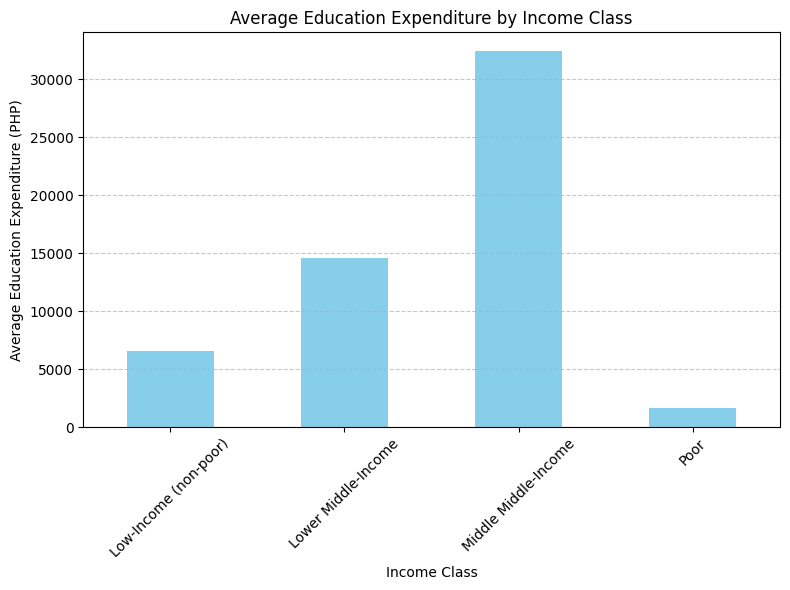

In [36]:
#do poor families with family member of 5 to 17 support education
student = census[census['Members with age 5 - 17 years old'] > 0]
student = census[census['Total Number of Family members'] == 3]
student_income_class = student.groupby(['Income Class'])['Education Expenditure'].mean().head(4)

student_income_class.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Average Education Expenditure by Income Class')
plt.xlabel('Income Class')
plt.ylabel('Average Education Expenditure (PHP)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()